In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv')
df.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [43]:
# Medidas descritivas dos dados
df.describe()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.845210,122.704671,20.676168,138.168423
std,8.505102,27.216325,6.804081,21.521514
min,40.000000,40.000000,0.000000,70.000000
25%,60.219824,104.703436,16.175859,123.926952
50%,65.735216,122.352692,20.588173,137.747897
75%,71.462362,140.679557,25.169889,151.993406
max,90.000000,200.000000,40.000000,200.000000


C:\Users\gusta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Batimentos cardiacos', ylabel='Batimentos cardiacos'>

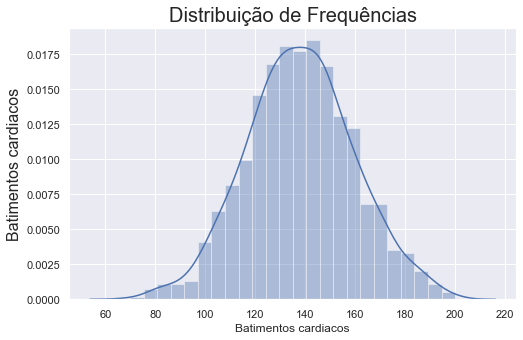

In [54]:
# Distribuição da variável target: Batimentos cardíacos

ax = sns.distplot(df['Batimentos cardiacos'])
ax.figure.set_size_inches(8, 5)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Batimentos cardiacos', fontsize=16)
ax

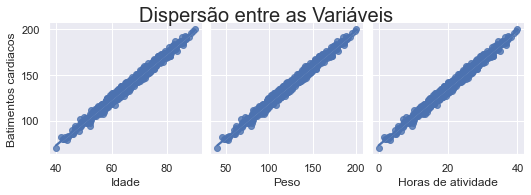

In [48]:
# Correlação entre as variáveis

ax = sns.pairplot(df, y_vars='Batimentos cardiacos', x_vars=['Idade', 'Peso', 'Horas de atividade'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

A distribuição da variável target e a sua correlação com as demais atividades é uma correlação positiva. Ou seja, os batimentos cardíacos aumentam, na medida que a Idade, o Peso e as Horas de atividade aumentam.

In [55]:
# Definição dos conjuntos de treino e teste

y = df['Batimentos cardiacos']
X = df[['Idade', 'Peso', 'Horas de atividade']]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=266)

In [57]:
# Tamanho da base de treino

X_train.shape

(750, 3)

In [58]:
#Tamanho da base de teste

X_test.shape

(250, 3)

# Treinando o modelo

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

LinearRegression()

In [60]:
# R da curva de treino

print('R² = {}'.format(modelo_1.score(X_train, y_train).round(2)))

R² = 0.99


In [61]:
# R ajustado com as bases de teste

y_previsto = modelo_1.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.98


# Fazendo previsões pontuais

In [77]:
entrada = X_test[5:6]
print(entrada)

         Idade        Peso  Horas de atividade
575  62.865617  113.169976           18.292494


In [78]:
print('{0:.2f} batimentos cardíacos'.format(modelo_1.predict(entrada)[0]))

130.71 batimentos cardíacos
